<a href="https://colab.research.google.com/github/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/Project-2/Projeto_2_Visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2 - Visualização de dados



<br>


**SCC0652 - Visualização Computacional (2020/2)**

<br>

[Projeto no GitHub](https://github.com/brenoslivio/SCC0652_Computational_Visualization)

<br>

**Alunos:**

Afonso Henrique Piacentini Garcia, Nº USP: 9795272

Breno Lívio Silva de Almeida, Nº USP: 10276675

Vitor Henrique Gratiere Torres, Nº USP: 10284952

---

## Sumário


1. [Descrição](#descricao)

  1.1 [dfPokemon.csv](#pokemoncsv)

  1.2 [Visualizações](#visual)

2. [Desenvolvimento](#desenvolvimento)

  2.1 [Carregando os dados](#dados)

  2.2 [Cores das visualizações](#cores)

  2.3 [Visualizando os dados](#visual)

    * [Outliers](#outliers)

    * [Correlações](#corr)

    * [Distribuição](#dist)

    * [Wordcloud](#wordcloud)



## Descrição <a name="descricao"></a>

Essa parte do projeto da disciplina consiste na visualização de um conjunto de dados, um dataset, que no Projeto 1 foi previamente processado e analisado. Alguns destes itens previamente analisados foram considerados relevantes para o desenvolvimento do projeto 2, e portanto serão utilizados. Lembrando que o conjunto de dados escolhido foi o de [Pokémons](https://www.pokemon.com/br/), do vídeo-game homônimo. Vamos usar o arquivo gerado do projeto anterior para o desenvolvimento dessa parte e possivelmente da seguinte.

### [dfPokemon.csv](https://github.com/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/Project-2/dfPokemon.csv) <a name="pokemoncsv"></a>

*   cod: O número do pokémon na Pokédex;
*   name: O nome do pokémon;
*   generation: a qual geração o pokémon em questão pertence;
*   status: refere-se a raridade do pokémon, variando de normal até mítico;
*   species: apelido dado para cada pokémon baseado em algum de seus atributos;
*   form: discriminante de mega evoluções e outras formas;
*   type1: tipo do pokémon;
*   type2: segundo tipo do pokémon, caso possua;
*   height_m: altura do pokémon em metros;
*   weight_kg: peso do pokémon em kilogramas.
*   total: soma total dos stats do pokémon;
*   hp: stat que indica a vida base do pokémon;
*   attack: stat que indica o poder de ataque fisico base do pokémon;
*   defense: stat que indica a defesa física base do pokémon;
*   spatk: stat que indica o poder de ataque especial do pokémon;
*   spdef: stat que indica o poder de defesa especial do pokémon;
*   speed: stat que indica a velocidade base do pokémon;
*   img: link para a imagem do pokémon;




## Desenvolvimento <a name="desenvolvimento"></a>

Vamos visualizar os dados, tendo em mente sua composição total, e inferir conclusões acerca das visualizações feitas.

### Carregando os dados <a name="dados"></a>

Agora vamos carregar os dados gerados no projeto anterior. Para tal, iremos ler o csv, já indicando o tipo de cada variável para o data frame em questão. Tal data frame será usado ao decorrer desse projeto para a visualização adequada.



In [1]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
dfPokemon = pd.read_csv(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computationa"
    + "l_Visualization/master/notebooks/Project-2/dfPokemon.csv",
    dtype={
        "cod": str,
        "name": str,
        "generation": np.int32,
        "status": str,
        "species": str,
        "form": str,
        "type1": str,
        "type2": str,
        "height_m": np.float64,
        "weight_kg": np.float64,
        "total": np.int32,
        "hp": np.int32,
        "attack": np.int32,
        "defense": np.int32,
        "spatk": np.int32,
        "spdef": np.int32,
        "speed": np.int32,
        "img": str,
    },
    na_values="",
)

dfPokemon.sample(5)

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
813,704,Goomy,6,Normal,Soft Tissue Pokémon,NaN,Dragon,NaN,0.3,2.8,300,45,50,35,55,75,40,https://img.pokemondb.net/sprites/home/normal/...
808,699,Aurorus,6,Normal,Tundra Pokémon,NaN,Rock,Ice,2.7,225.0,521,123,77,72,99,92,58,https://img.pokemondb.net/sprites/home/normal/...
172,135,Jolteon,1,Normal,Lightning Pokémon,NaN,Electric,NaN,0.8,24.5,525,65,65,60,110,95,130,https://img.pokemondb.net/sprites/home/normal/...
819,710,Pumpkaboo,6,Normal,Pumpkin Pokémon,Average Size,Ghost,Grass,0.4,5.0,335,49,66,70,44,55,51,https://img.pokemondb.net/sprites/home/normal/...
828,713,Avalugg,6,Normal,Iceberg Pokémon,NaN,Ice,NaN,2.0,505.0,514,95,117,184,44,46,28,https://img.pokemondb.net/sprites/home/normal/...


### Cores das visualizações <a name="cores"></a>

Antes de propriamente visualizar os dados, é importante ressaltar a escolha de uma palheta adequada de cores. Na biblioteca do Seaborn temos diversas [opções de palhetas de cores](https://seaborn.pydata.org/tutorial/color_palettes.html). Iremos trabalhar com a opção "colorblind" para tentar tornar as visualizações mais acessíveis.

Entretanto, algumas situações específicas, como as cores dos tipos dos Pokémons e a Pokébola feita em Word cloud, seguirão os padrões esperados da franquia de videogame. Algumas cores em questão servem para tornar a visualização mais fiel ao conjunto de dados.

Exemplo de palheta padrão

In [3]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Exemplo de palheta colorblind

In [4]:
sns.set_palette("colorblind")
sns.color_palette()

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

Definiremos também um dicionário que assimila os tipos dos pokemons com as suas cores.

In [5]:
colorsType = {
    "Bug": "#a6b91a",
    "Dark": "#705746",
    "Dragon": "#6f35fc",
    "Electric": "#f7d02c",
    "Fairy": "#d685ad",
    "Fighting": "#c22e28",
    "Fire": "#ee8130",
    "Flying": "#a98ff3",
    "Ghost": "#735797",
    "Grass": "#7ac74c",
    "Ground": "#e2bf65",
    "Ice": "#96d9d6",
    "Normal": "#a8a77a",
    "Poison": "#a33ea1",
    "Psychic": "#f95587",
    "Rock": "#b6a136",
    "Steel": "#b7b7ce",
    "Water": "#6390f0",
}
cinza = "#808080"
transparente = "rgba(0,0,0,0)"

### Visualizando os dados <a name="visual"></a>

A ideia da visualização de dados é muito importante para possibilitar uma identificação mais rápida e precisa sobre informações relevantes de um conjunto de dados, fazendo com que até mesmo leigos sobre um assunto possam pelo menos ter uma breve noção do comportamento dos dados em questão. Para isso precisamos fazer visualizações realmente pensadas e justificadas com base no tipo de dados que estamos lidando.

Esta seção irá servir não somente para mostrar algumas informações interessantes (como outliers, relações, entre outros) por meio de vários tipos de visualizações, mas também para justificar o uso dessas. 

Vale lembrar que estamos lidando com um dataset híbrido, contendo diversas categorias como `generation`, `status` e `type1`, e também contendo diversas variáveis numéricas como `height_m`, `weight_kg`, `total`, `hp`, `attack`, `defense`, entre outros. O catálogo [From Data to Viz](https://www.data-to-viz.com/) nos mostra diversas visualizações que podemos fazer com base nesse conjunto de dados híbrido.

#### Outliers <a name="outliers"></a>

Podemos encontrar Outliers por meio de diferentes tipos de visualizações. Algumas possíveis formas são demonstradas a seguir, escolhidas baseadas na sua relevância para os dados analisados no projeto.

Podemos observar outliers bastando apenas fazer gráficos de linha. Então, por exemplo, se quisermos detectar outliers visualmente, é possível notar uma discrepância da forma que um ponto acaba levando uma linha.

generation
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total, dtype: object

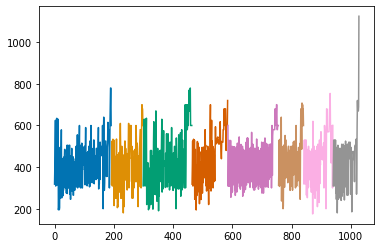

In [6]:
dfPokemon.groupby("generation")["total"].plot()

Mas o mais adequado realmente para achar outliers talvez seja o boxplot, que trabalha com a ideia do intervalo interquantil e ver o quanto os dados escapam desse intervalo. Dessa forma, no gráfico de linha, notamos o mesmo outlier novamente na oitava geração.

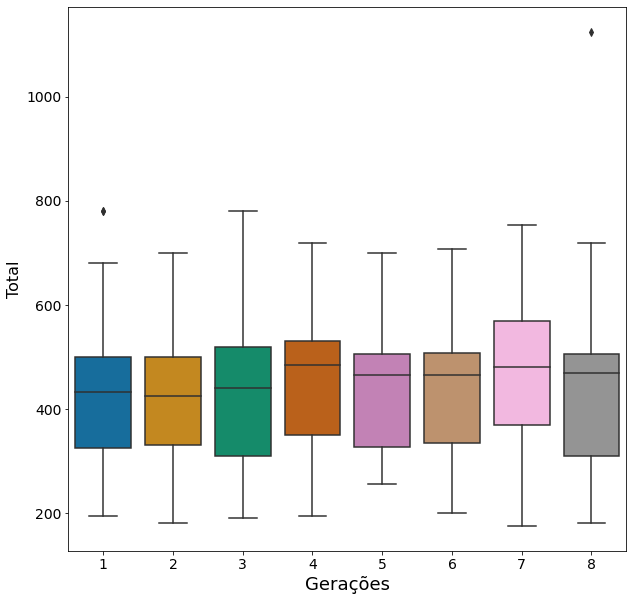

In [7]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="generation", y="total", data=dfPokemon)
plt.xlabel("Gerações", fontsize=18)
plt.ylabel("Total", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

Outra alternativa ao gráfico boxplot é o gráfico de violino. Tal visualização permite a criação de um gráfico intuitivo no qual pode-se ver onde os dados se acumulam e onde eles são menos frequentes, mostrando a distribuição dos dados ao longo da reta. A visualização do boxplot junto à de violino, permite uma boa análise visual do comportamento dos dados, onde sua mediana se encontra e onde os outliers estão localizados. Segue abaixo gráficos de violino para as mesmas variáveis estudadas anteriormente.

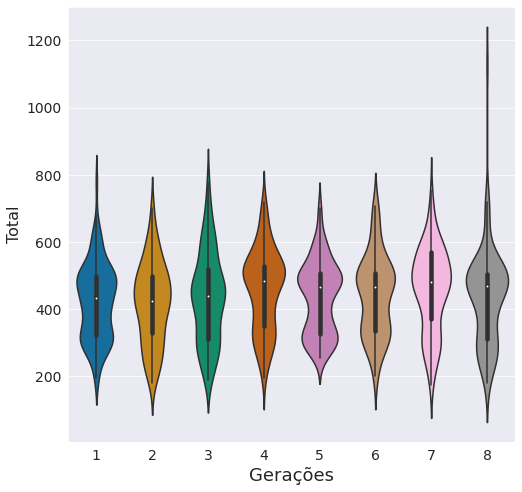

In [18]:
plt.figure(figsize=(8, 8))
sns.set_style("darkgrid")
sns.violinplot(x="generation", y="total", data = dfPokemon)
plt.xlabel("Gerações", fontsize=18)
plt.ylabel('Total', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

#### Correlações <a name="corr"></a>

Encontrar correlações em um conjunto de dados pode ser sempre interessante para descobrir algumas possíveis ligações entre variáveis, as quais nem sempre eram esperadas. Vamos visualizar essas correlações por meio de Heatmaps, usando as conhecidas correlações de Pearson e Spearman.

Antes de tudo, é aconselhável a [normalização dos dados](https://python-graph-gallery.com/94-use-normalization-on-seaborn-heatmap/) para se fazer visualizações com Heatmap. Entretanto, como apenas queremos fazer Heatmaps para ver as correlações de Pearson e Spearman, sendo estas já normalizadas por definição, podemos fazer diretamente sem perda de dados.


Correlação de Pearson


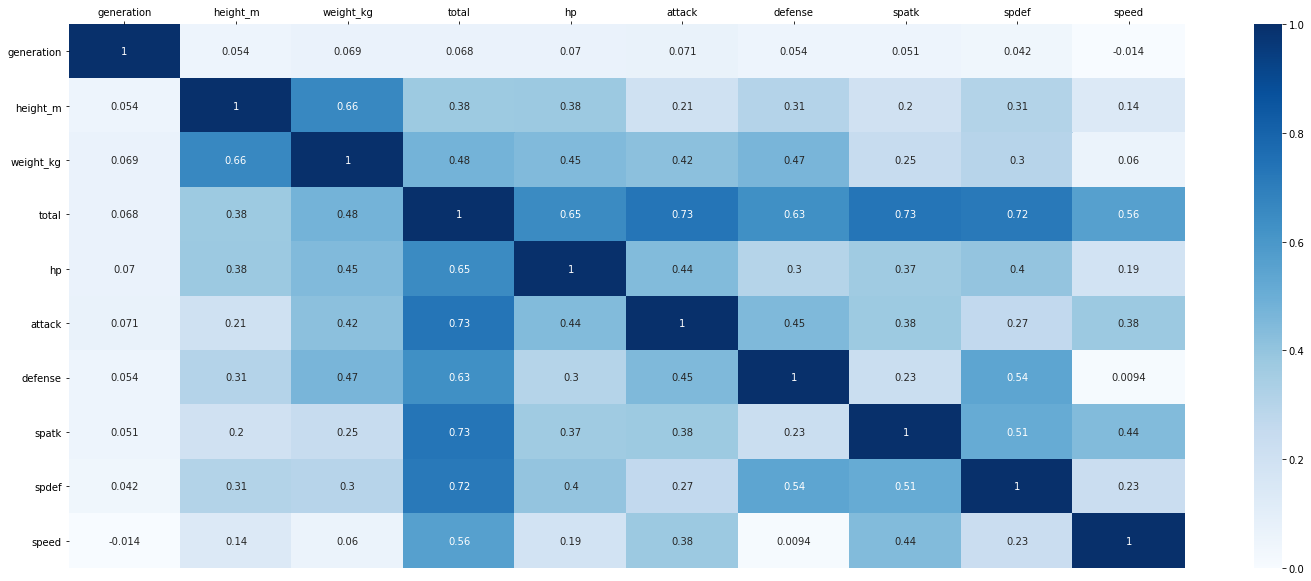

In [8]:
corrmat = dfPokemon.corr(method="pearson")
plt.figure(figsize=(25, 10))
sns.heatmap(
    corrmat, vmax=1, vmin=0, annot=True, cmap="Blues"
).xaxis.tick_top()

Correlação de Spearman

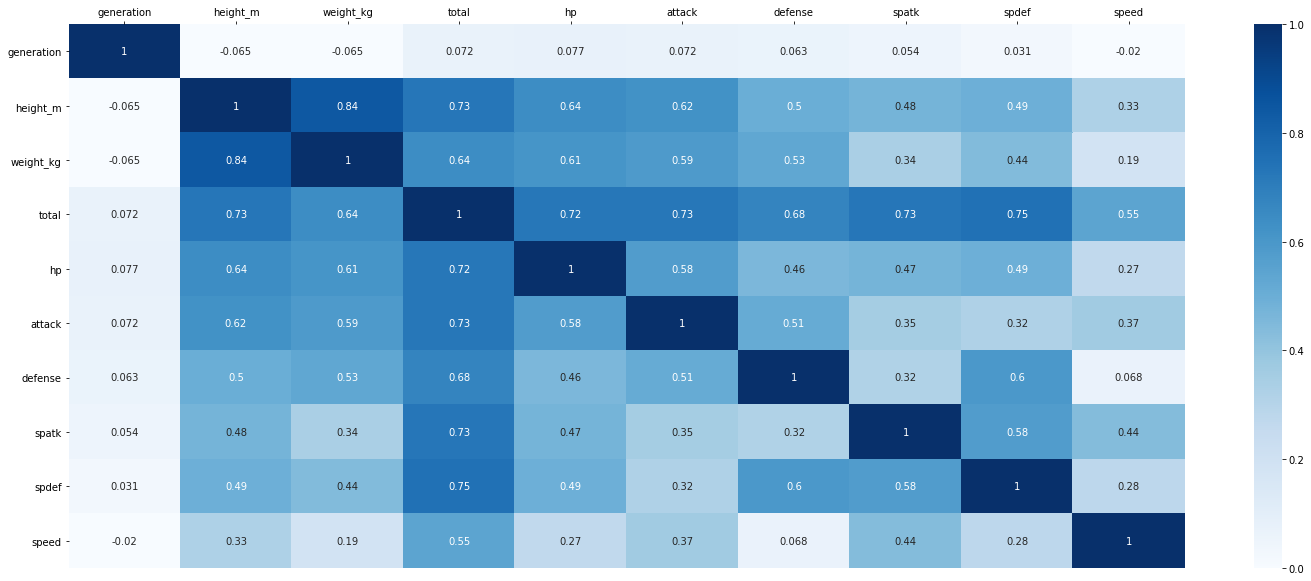

In [9]:
corrmat = dfPokemon.corr(method="spearman")
plt.figure(figsize=(25, 10))
sns.heatmap(
    corrmat, vmax=1, vmin=0, annot=True, cmap="Blues"
).xaxis.tick_top()

É interessante observar que em Spearman as correlações se mostraram mais fortes que no caso da correlação de Pearson. Isso ocorre porque os dados que estamos tratando não são dispostos de uma forma linear, o que prejudica o cálculo do coeficiente da correlação de Pearson. Dessa forma, o Spearman se mostrou mais efetivo.

Algumas correlações relevantes com certeza foram as esperadas para os stats dos Pokémons, pois `total` representa a soma de todos os stats `hp`, `attack`, `defense`, `spatk`, `spdef`, `speed`, então faz sentido ter uma correlação um tanto mais elevada.

A correlação não tão esperada e ampliada por Spearman, foi sobre a altura (`height_m`) e o peso (`weight_kg`) dos Pokémons. Mostrando uma certa tendência de quanto mais alto for o Pokémon mais pesado ele será.

Dado isso, vamos fazer um Scatter plot com os valores em logaritmo para vermos a relação de maneira mais clara.

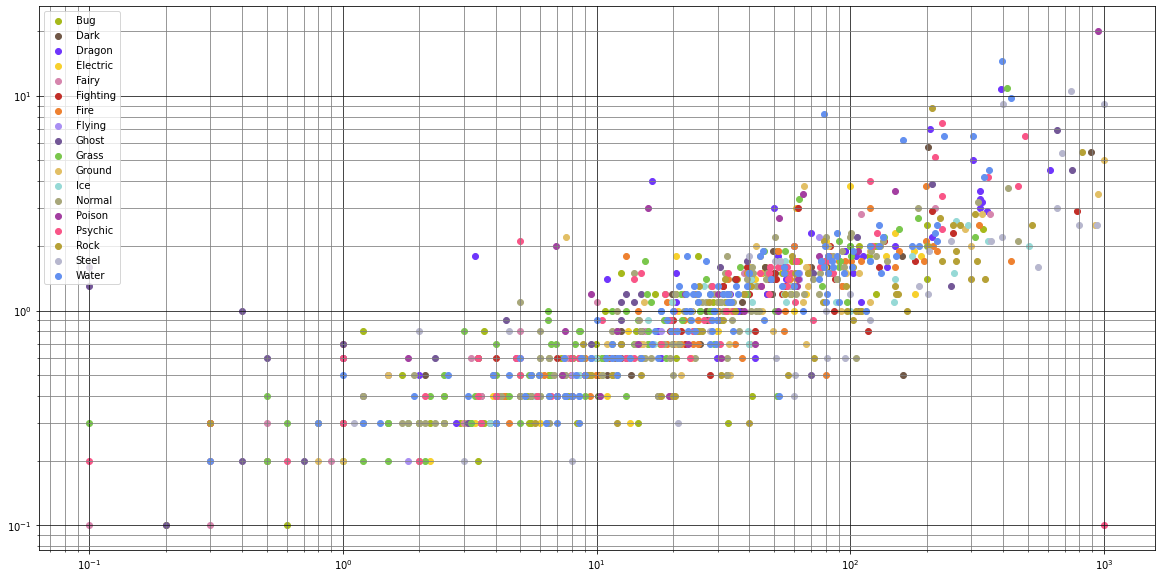

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))

for type1, cc in colorsType.items():
    
    lines = dfPokemon.loc[:, "type1"] == type1
    
    ax.scatter(
        x=dfPokemon.loc[lines, "weight_kg"],
        y=dfPokemon.loc[lines, "height_m"],
        c=cc,
        label=type1,
    )

ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True, which="minor", ls="-", color='0.5')
ax.grid(True, which="major", ls="-", color='0.1')
ax.legend()

#### Distribuição <a name="dist"></a>

Vamos visualizar a distribuição das variáveis cabíveis por meio de histogramas. Devemos acrescentar que um histograma realmente é um gráfico de barras, entretanto as observações feitas em bins devem ter área igual a 1. Além disso, é interessante ter um número considerável de bins para não haver perda de dados.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5cc0096a0>,
      dtype=object)

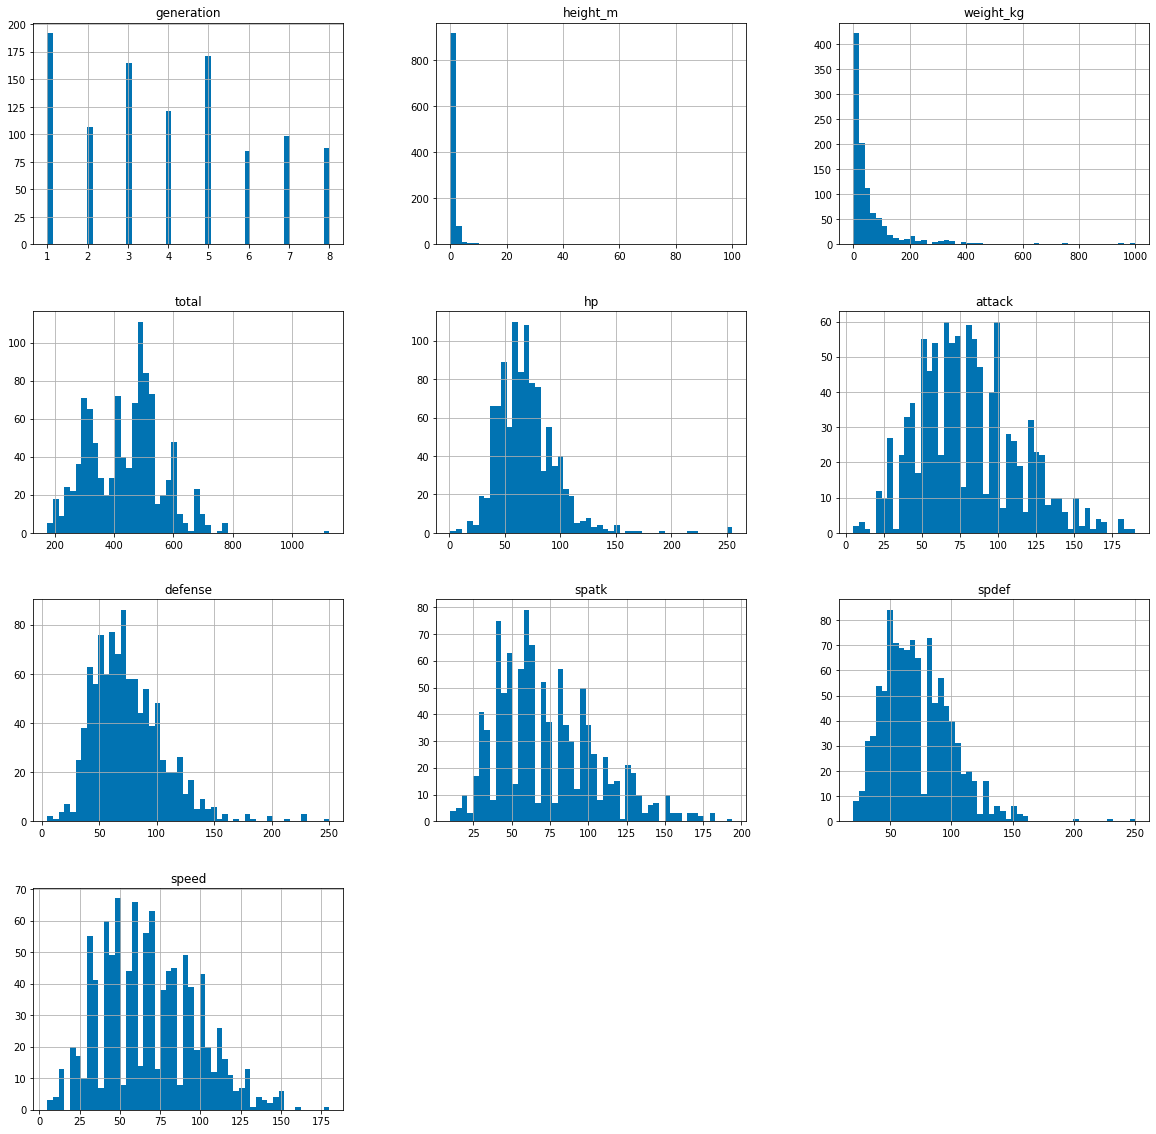

In [11]:
dfPokemon.hist(bins=50, figsize=(20, 20))

Podemos notar que algumas distribuições podem se parecer com alguma distribuição mais específica, como uma Gaussiana, mas isso nem sempre se verifica. Entretanto podemos fazer alguns teste como o de [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) para testar a hipótese na visualização feita. No caso, temos um exemplo que funciona para a distribuição da variável `weight_kg`.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



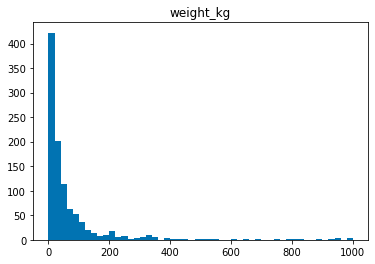

Nao ha evidencia para rejeitar H0 (pode ser uma Gaussiana), P = 1.0


In [12]:
data = dfPokemon["weight_kg"].values
stat, p = shapiro(data)

alpha = 0.05

if p > alpha:
    msg = ("Nao ha evidencia para rejeitar H0"
           + " (pode ser uma Gaussiana)")
else:
    msg = "Amostra não parece uma Gaussiana (rejeita H0)"

title = "weight_kg"
plt.title(title)
plt.hist(data, bins=50)
plt.show()

sP = str(p)

print(msg + ", P = " + sP)

Outra forma interessante de analisar distribuições de variáveis seria o uso do [Pair Plot](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Nele, podemos observar várias distribuições agrupadas de forma que nos permita visualizar relações entre as diferentes variáveis no nosso conjunto de dados. Na distribuição a seguir veremos distribuições agrupadas por gerações analisando as variáveis possíveis como `total`, `hp`, entre outras.

<Figure size 1440x1440 with 0 Axes>

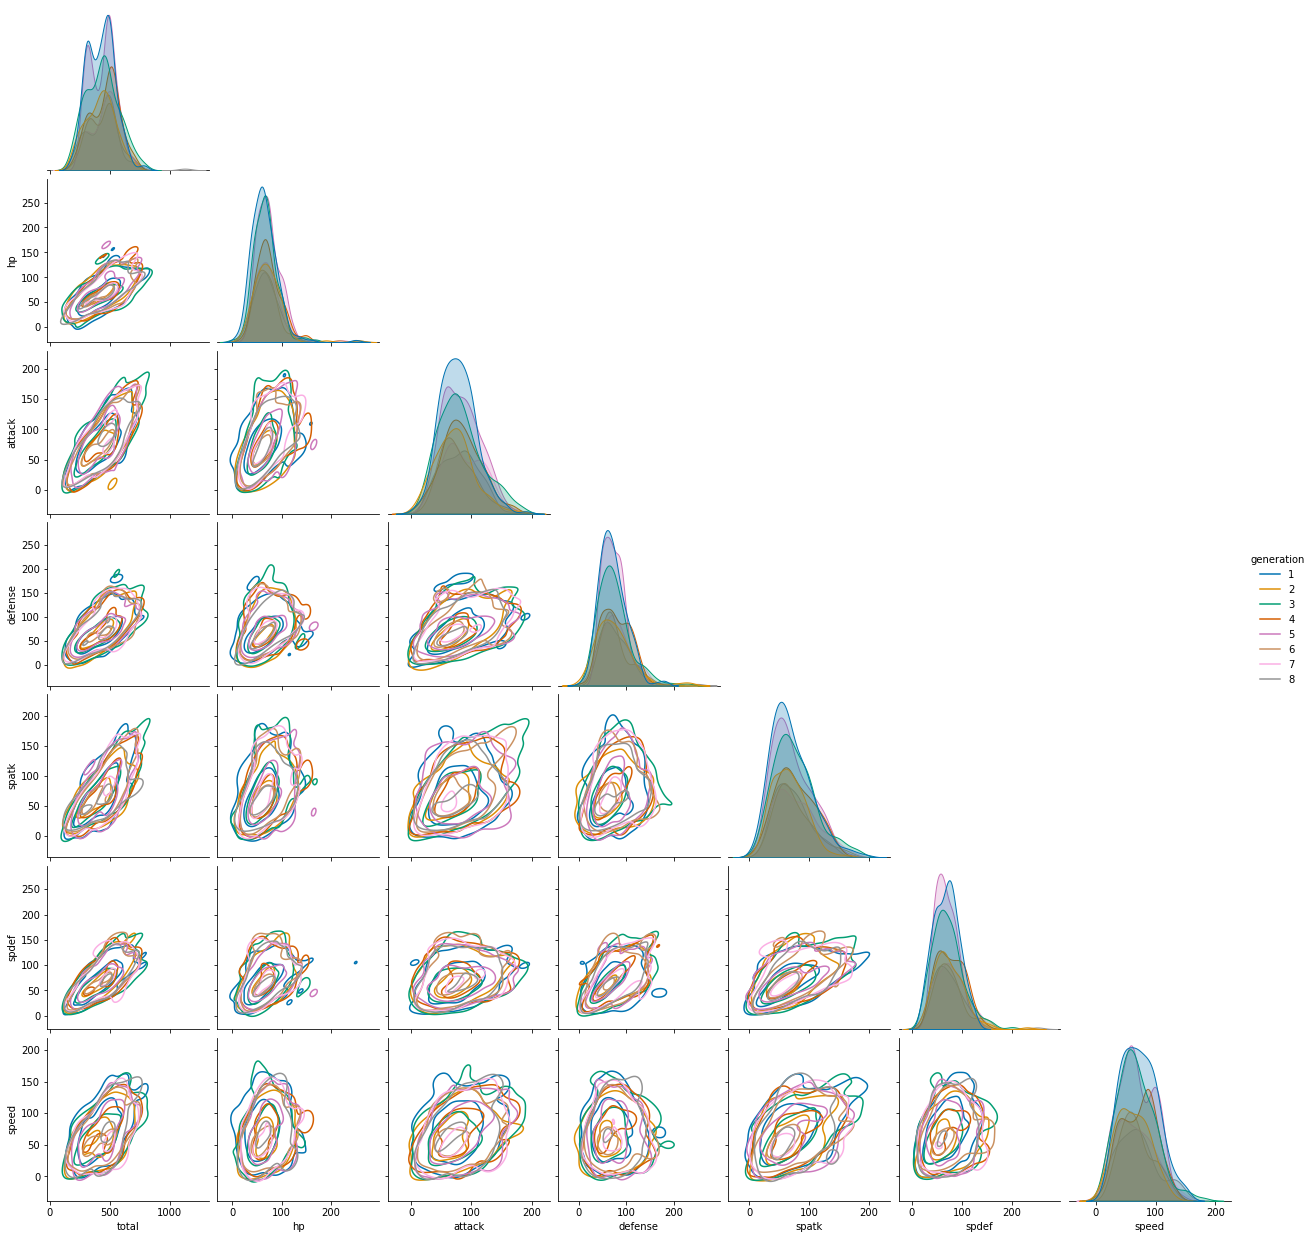

In [13]:
plt.figure(figsize=(20, 20))
# sns.pairplot(dfPokemon.loc[dfPokemon.loc[:, 'generation'] == 2, :],
sns.pairplot(
    dfPokemon,
    vars=[
        "total",
        "hp",
        "attack",
        "defense",
        "spatk",
        "spdef",
        "speed",
    ],
    hue="generation",
    palette="colorblind",
    kind="kde",
    corner=True,
    plot_kws={"levels": 3},
)  # 'fill': True,'alpha': .2

Outro dado interessante que podemos visualizar a distribuição é a da quantidade de tipos de Pokémons. Podemos trabalhar com um simples gráfico de barras, analisando a frequência absoluta de cada tipo. Como cada Pokémon pode ter dois tipos com Type 1 e Type 2, iremos ver a distribuição para cada um e a soma de ambos.

In [14]:
typesAcc = {i: None for i in range(0, 3)}

typesAcc[0] = dfPokemon.value_counts("type1", sort=True, ascending=True)
typesAcc[1] = dfPokemon.value_counts("type2", sort=True, ascending=True)
typesAcc[2] = typesAcc[0] + typesAcc[1]
typesAcc[2].sort_values(inplace=True)

typesAcc[0].name = "Type 1"
typesAcc[1].name = "Type 2"
typesAcc[2].name = "Type 1 + Type 2"


# Criacao dos subplots
fig = make_subplots(
    rows=1,
    cols=3,
    shared_xaxes="all",
    specs=[[{}, {}, {}]],
    subplot_titles=[typesAcc[i].name for i in range(0, 3)],
)

# Definicao do layout
fig.update_layout(
    font_color=cinza,
    autosize=True,
    height=550,
    margin=dict(l=0, r=0, t=50, b=0),
    title_text="Quantidade de Pokemons por tipo",
    paper_bgcolor=transparente,
    plot_bgcolor=transparente,
    showlegend=False,
)

for i in range(0, 3):
    fig.add_trace(
        go.Bar(
            x=typesAcc[i].values,
            y=typesAcc[i].keys(),
            name=typesAcc[i].name,
            orientation="h",
            marker=dict(
                color=typesAcc[i].keys().map(colorsType),
            ),
            text=typesAcc[i].values,
            textposition="inside",
            hovertemplate="%{y}: %{x}",
        ),
        row=1,
        col=i + 1,
    )
    fig.update_xaxes(
        title_text="Quantidade", gridcolor=cinza, row=1, col=i + 1
    )
    fig.update_yaxes(gridcolor=cinza, row=1, col=i + 1)

fig.show(renderer="colab")

Também podemos visualizar esses tipos em questão para entender exatamente como são os Pokémons que pertencem a essas categorias. Dessa forma, vamos ver a média dos valores dos stats `hp`, `attack`, `defense`, `speed`, `spatk` e `spdef` por meio de um Radar chart. Ele vai nos permitir facilmente entender para qual stat um Pokémon de tal tipo tende a ser melhor, por exemplo.

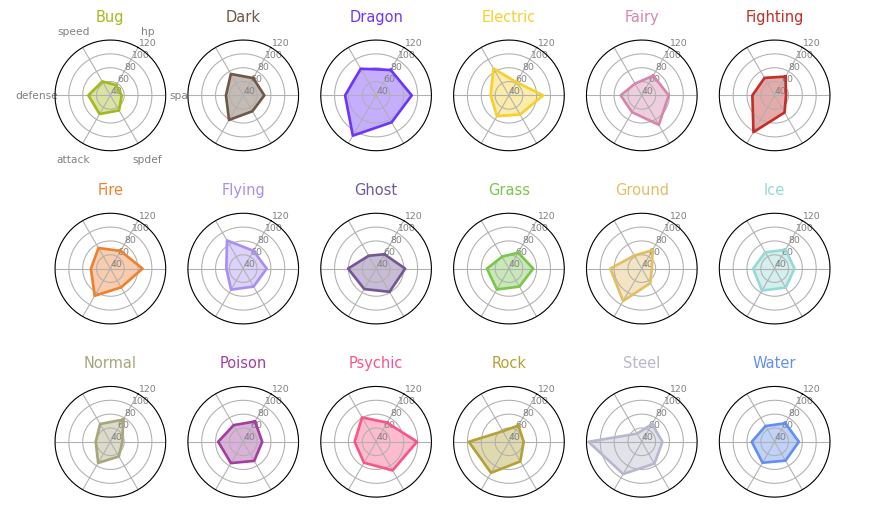

In [15]:
from math import pi

# baseado no codigo em:
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/

def radar(linha, cor):

    # numero de variaveis
    N = len(categories[1:])

    # definicao do angulo de cada eixo das variaveis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # inicializando o grafico de radar
    ax = plt.subplot(3, 6, linha + 1, polar=True)

    # girando o eixo 60º antihorarios
    ax.set_theta_offset(pi / 3)
    ax.set_theta_direction(-1)

    if linha == 0:
        # desenha um eixo por variavel + titulos
        plt.xticks(angles[:-1], categories[1:], color="grey", size=8)
    else:
        # desenha um eixo por variavel
        plt.xticks(angles[:-1], categories[1:], color="grey", alpha=0)

    yrange = list(range(40, 121, 20))
    yrangestr = [str(x) for x in yrange]
    
    # desenha as linhas em y
    ax.set_rlabel_position(0)
    plt.yticks(yrange, yrangestr, color="grey", size=7)
    plt.ylim(40, 120)

    # plot
    values = stats.loc[linha].drop("type1").values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=cor, linewidth=2, linestyle="solid")
    ax.fill(angles, values, color=cor, alpha=0.4)

    # titulo do grafico
    plt.title(stats.loc[linha, "type1"], size=11, color=cor, y=1.1)


# inicializa a figura
dpi = 96
plt.figure(figsize=(1000 / dpi, 650 / dpi), dpi=dpi)

categories = [
    "type1",
    "hp",
    "spatk",
    "spdef",
    "attack",
    "defense",
    "speed",
]

stats = dfPokemon.loc[:, categories].groupby("type1", as_index=0).mean()

for linha in range(0, len(stats.index)):
    radar(linha, colorsType[stats.loc[linha, "type1"]])

#### Word cloud <a name="wordcloud"></a>

Outra visualização interessante e famosa a ser feita é a nuvem de palavras (word cloud). Por meio dela podemos gerar uma visualização agradável, mesmo para os leigos em visualizações de dados. Vamos fazer uma nuvem de palavras usando da imagem que lembra uma Pokébola do vídeo-game, fazendo com que cada palavra seja um Pokémon e o tamanho de sua palavra seja relacionado com a variável que representa a soma de seus stats, a `total`. Como estamos usamos usando a Pokébola com uso acadêmico, entra na ideia de "Fair use", e não há problemas com direitos de imagem.

In [16]:
!pip install multidict
!pip install wordcloud

     |████████████████████████████████| 143kB 8.2MB/s 


890 pokémons usados.


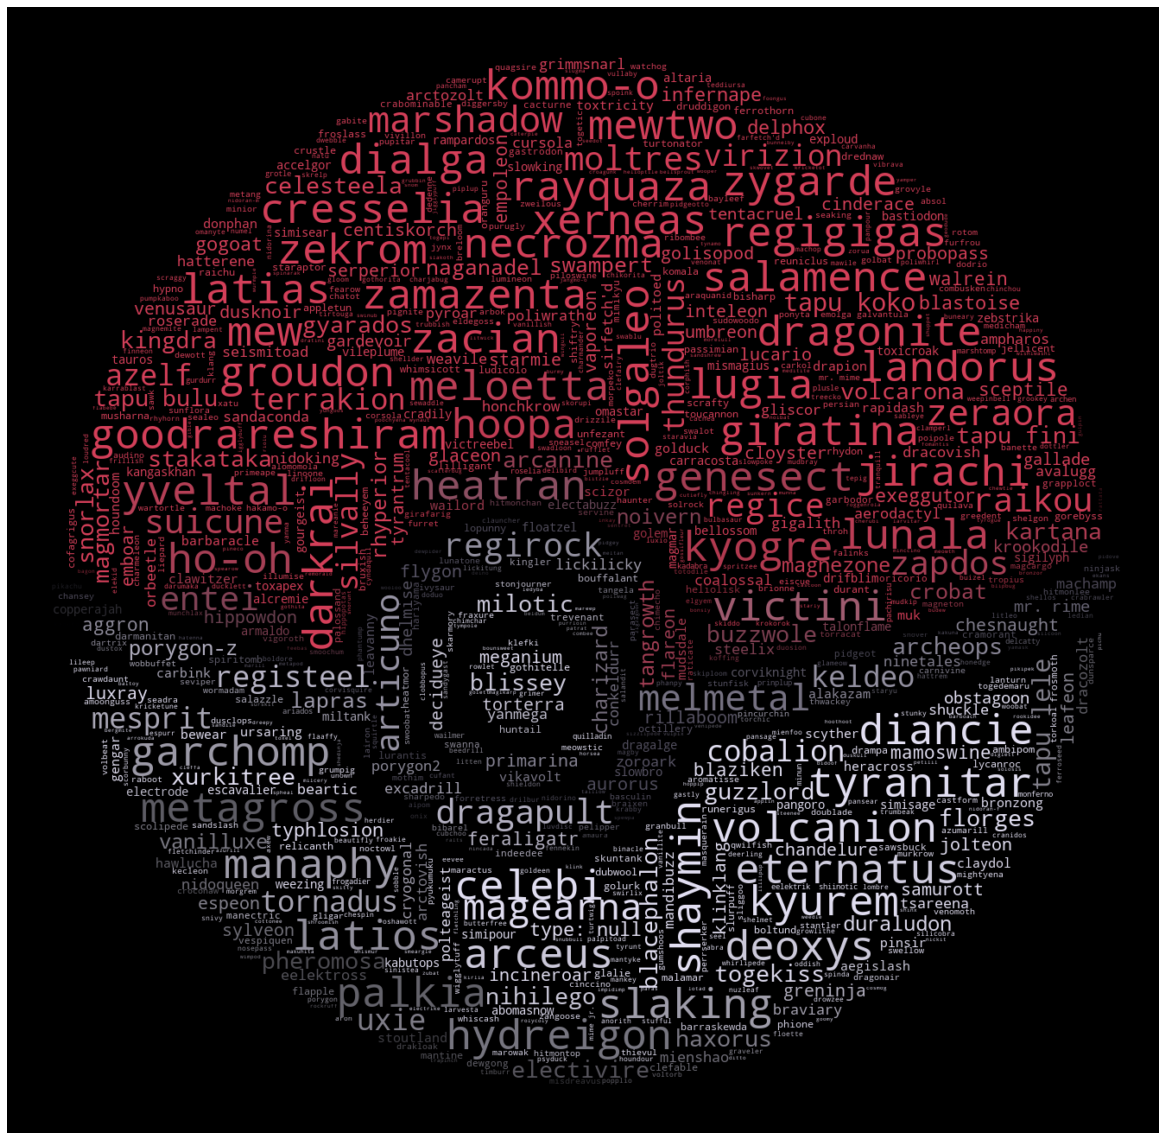

In [17]:
import multidict
import requests
import random

from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO

df = dfPokemon

df = df.drop_duplicates("name")

comment_words = ""

def getFrequencyDictForText():
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for val in df.name:
        tmpDict[val.lower()] = df.loc[df["name"] == val].total.item()
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

# Retirado e modificado de https://webstockreview.net/
response = requests.get(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computationa"
    + "l_Visualization/master/notebooks/Project-2/image/pokeball.png",
)
img = Image.open(BytesIO(response.content))

pokeball_color = np.array(img)

pokeball_color = pokeball_color[::3, ::3]

pokeball_mask = pokeball_color.copy()
pokeball_mask[pokeball_mask.sum(axis=2) == 0] = 255

edges = np.mean(
    [
        gaussian_gradient_magnitude(pokeball_color[:, :, i] / 255.0, 2)
        for i in range(3)
    ],
    axis=0,
)
pokeball_mask[edges > 0.08] = 255

wordcloud = WordCloud(
    max_words=2000,
    background_color="black",
    mask=pokeball_mask,
    max_font_size=48,
    relative_scaling=0,
)

pokemonDict = getFrequencyDictForText()

wordcloud.generate_from_frequencies(pokemonDict)

print(str(len(pokemonDict)) + " pokémons usados.")

image_colors = ImageColorGenerator(pokeball_color)

# plot the WordCloud image
plt.figure(figsize=(16, 16))
plt.imshow(
    wordcloud.recolor(color_func=image_colors), interpolation="bilinear"
)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

É importante observar que foram removidos os Pokémons com formas alternativas por conterem nomes iguais, então usamos 890 pokémons, menos que o total dos dados que temos.

Outra informação relevante é que o próprio tamanho máximo da palavra no word cloud já acaba, de certa forma, normalizando os dados, não havendo, assim, problemas de visualizar valores com um intervalo muito grande como ocorria antes

